# Trabalho de Termodinâmica Aplicada: 
### Cálculos de propriedades termodinâmicas e de equilíbrio de fases utilizando equações de estado e modelos de G de excesso

##### Adriana Teixeira
##### TPQB - Doutorado
##### 2016/3

#### O objetivo deste trabalho é realizar cálculos de propriedades termodinâmicas para os componentes puros ÁGUA e ETANOL, considerando a Equação de Estado SRK, e em seguida realizar cálculos para a mistura destes compostos, utilizando o modelo NRTL de G de excesso. 

#### Para facilitar a execução, este trabalho foi dividido em três arquivos:
>* 1- Cálculos para o componente puro AGUA
>* 2- Cálculos para o componente puro ETANOL
>* 3- Cálculos para o sistema binário AGUA + ETANOL


### *2) Cálculos para o componente puro ETANOL*

O primeiro passo é avaliar o sistema pela Regra das fases de Gibbs, para conhecer os graus de liberdade permitidos. Assim, para um componente, em equilíbrio L-V:  

Variância = C − F + 2 = 1 - 2 + 2  = 1 
    
Então, para um componente puro, basta determinar uma variável independente para caracterizar o sistema. Para uma determinada temperatura haverá uma pressão de saturação, que corresponde ao ponto de equilíbrio L-V. 

A pressão de saturação de um componente puro pode ser medida experimentalmente, calculada por equações como as de Clapeyron, Antoine ou Wagner, ou por Equações de Estado. 

A seguir serão realizados os cálculos utilizando:
>* 2 - A - Equação de Estado SRK
>* 2 - B - Equação de Antoine
>* 2 - C - Comparação dos resultados anteriores com dados experimentais

#### *2 - A) Cálculo da pressão de saturação pela Equação de Estado Soave-Redlich-Kwong (SRK)*

Uma maneira de se calcular a Pressão de Saturação de um composto puro utilizando uma equação de estado é considerar que, na condição de equilíbrio, o potencial químico (e a fugacidade) do composto é igual na fase líquida e na fase vapor. E que, nesta condição, a pressão no equilíbrio é a pressão de saturação. 

Outra propriedade do equilíbrio é que a igualdade de potencial químico do composto em cada fase é igual à energia livre de Gibbs em cada fase. 

Para um componente também pode-se considerar a igualdade de energia livre de Gibbs residual em cada fase, pois G(residual) = G - G (gas ideal), e o G (gas ideal) é igual para as duas fases.  

Assim, calculando-se G(residual) para cada fase, a pressão que vai igualar o G(residual)de ambas é a pressão de saturação. 

Então, o primeiro passo é calcular as raízes de volume da Equação de Estado considerando uma condição de P e T. Depois, o cálculo de Gresidual para cada raiz de volume encontrada, avaliando a pressão que iguala estes valores. 


In [1]:
import numpy as np

In [2]:
from scipy import optimize as opt

As propriedades conhecidas das substâncias são as propriedades críticas (Tc e Pc) e o fator acêntrico (representado por w).

A Equação de Estado de SRK é definida conforme abaixo:

$P=\frac{RT}{\bar{V}-b}-\frac{a(T)}{{\bar{V}}({\bar{V}+b})}$  

Onde, os parâmetros "a" e "b" podem ser calculados por:

$a(T)=\frac {{0.42748} {alpha} {R^2} {Tc^2}}{Pc} $

$b=\frac{{0.08664} {R}{Tc}}{{Pc}}$

O cálculo de alpha depende do fator acêntrico, conforme pode ser visto a paritr das duas equações a seguir:

$m={(0.48+1.574{w}-0.176{w^2})}$

$alpha={[1+{m}{(1-Tr^{1/2})}]^2}$

Onde

$Tr=\frac {T}{Tc}$

In [3]:
# Dados iniciais - Propriedades Críticas do Etanol 
# Temperatura - Kelvin
# Pressão - Pa

# Constante de gás
R = 8.3144598     #J.mol^−1.K^−1

# Tc (K)
# Pc (Pa)

# Propriedades do Etanol

Tc = 513.9         # unidade K
Pc = 61.48*(10**5) # unidade Pa
w = 0.645          # fator acêntrico


# Definindo constante b
b = 0.08664*(R*Tc)/Pc



A equação SRK é uma equação de terceira ordem. Assim, calculados os parâmetros anteriores e com T e P definidos, a resolução da equação gerará até três raízes de volume diferentes. A menor raiz representa o volume da fase liquida e a maior representa o volume da fase gasosa. A raiz intermediária é desprezada pois não representa um sistema real.

A solução para a equação cúbica SRK pode ser encontrada a partir da resolução do polinômio de terceira ordem abaixo:

${P}{{\bar{V}}^3}-{(RT)}{{\bar{V}}^2}+{(a-Pb^2-RTb)}{\bar{V}}-ab=0$

Assim, considerando 323 K e 10000 Pa, as raízes serão calculadas a seguir. 

In [4]:
# Cálculo dos volumes para as condições abaixo
T = 323    #K
P = 100000 #Pa

T=323
Tr=T/Tc
m=(0.48+1.574*w-0.176*w**2)
alpha=(1+(m*(1-Tr**0.5)))**2
a=0.42748*(alpha*R**2*Tc**2)/Pc

Primeiro, são definidas as constantes do polinômio.

In [5]:
# Declaração dos coeficientes do polinômio gerado a partir da EoS SRK
c3 = P                 #coeficiente de v^3  
c2 = -(R*T)            #coeficiente de v^2
c1 = (a-P*b**2-R*T*b)  #coeficiente de v^1  
c0 = -a*b              #coeficiente de v^0

Os volumes são obtidos a partir da definição das raízes da equação.

In [6]:
# Para achar as raízes do polinômio, utiliza-se a biblioteca do numpy importada anteriormente
# np.roots calcula as raízes do polinômio considerando os coeficientes entre colchetes

v=np.roots([c3,c2,c1,c0])
print(v)



[  2.61046073e-02   6.78796032e-04   7.23018283e-05]


Conforme dito anteriormente, a menor raiz é a do volume da fase líquida, e a maior raiz é a do volume da fase gasosa.

In [7]:
# np.sort organiza os valores em ordem crescente

[v_Liq, v_intermediate, v_Vap] = np.sort(v)
print( "T(K)=",T,"","P(Pa)=",P,"","V_liq=",v_Liq,"","V_Vap=",v_Vap )

('T(K)=', 323, '', 'P(Pa)=', 100000, '', 'V_liq=', 7.2301828288934779e-05, '', 'V_Vap=', 0.026104607293934479)


#### *Energia livre de Gibbs Residual*

Com as raízes de volume calculadas para as duas fases, calcula-se a Energia Livre de Gibbs Residual para cada uma delas. 

A Energia Livre de Gibbs Residual pode ser expressa da seguinte forma: 

$${\bar{G}^{Res}}={{(RT)} {[Z-1-ln(Z-Beta)-qI]}}$$

Onde:

$Beta=\frac{bP} {RT}$    

$Z=\frac{PV}{RT}$       O cálculo de Z será realizado considerando os volumes do líquido ou de vapor, a depender da fase estudada

$q=\frac{alpha}{bRT}$          

$I={ln(\frac{Z+Beta}{Z})}$

> Smith, van Ness, Abbott, 2005, 7th-pt-BR, Ch. (6.2, 6.3)

In [8]:
# Calculo de Gresidual para as fases liquida e vapor

Z_liq=P*v_Liq/(R*T)
Z_vap=P*v_Vap/(R*T)
beta=b*P/(R*T)
q=a/(b*R*T)
I_liq=np.log((Z_liq+beta)/Z_liq)
I_vap=np.log((Z_vap+beta)/Z_vap)
G_residual_liq=R*T*(Z_liq-1-np.log(Z_liq-beta)-q*I_liq)
G_residual_vap=R*T*(Z_vap-1-np.log(Z_vap-beta)-q*I_vap)

print("T(K)=",T,"P(Pa)=",P,"G residual Liquido=",G_residual_liq,"G residual Vapor=", G_residual_vap)

('T(K)=', 323, 'P(Pa)=', 100000, 'G residual Liquido=', -3391.3479394188726, 'G residual Vapor=', -74.140331360861367)


Obs: A menor energia de Gibbs residual representa a fase mais estável na temperatura e pressão calculada, pois para um componente, Gresidual=potencial quimico. 

#### Cálculo da Pressão de Saturação pela EoS SRK

Finalmente é possível calcular a pressão de saturação. Na condição de equilíbrio líquido-vapor (ELV), a pressão é a pressão de saturação em determinada temperatura. 

A pressão de saturação é a pressão $ P $ que faz com que a diferença na energia residual de Gibbs entre a fase  líquida e a fase de vapor seja igual a zero a uma determinada temperatura. Não podemos explicitar $P$ como uma função da diferença na energia residual de Gibbs, então definimos uma função $ Residuo=abs(G_residual_liq - G_residual_vap) $ de $ P $
e vamos resolvê-lo numericamente, ou seja, tentar vários valores de $ P $ de acordo com uma metodologia de atualização e critérios de convergência.

Para automatizar essa tarefa, implementamos uma função chamada ** `def Psat (T,iguessP):` **, que calcula as raízes do volume, como antes, e avalia a diferença entre a energia residual de Gibbs em cada um desses estados.

In [9]:
# Cálculo de Psat com a EoS SRK, considerando a igualdade de fugacidades e Gresidual

def P_sat(T,iguess_P):
    
    
# Funções de T
# Definição das condições de contorno para o cálculo da Pressão de Saturação
    
    Tr=T/Tc
    m=(0.48+1.574*w-0.176*w**2)
    alpha=(1+(m*(1-Tr**0.5)))**2
    a=0.42748*(alpha*R**2*Tc**2)/Pc
 

    Residuo=1
    TOL=1e-9
    MAX=1000
    i=0
    P=iguess_P
 

############################# funções de P #declaração dos coeficientes da Raiz da EOS de SRK

    while(Residuo>TOL and i<MAX):#Ges dependem de V q depende de P
 
        c3 = P                    #coeficiente de v^3  
        c2 = -(R*T)               #coeficiente de v^2
        c1 = (a-P*b**2-R*T*b)     #coeficiente de v^1  
        c0 = -a*b                 #coeficiente de v^0
        v=np.roots([c3,c2,c1,c0]) #Para achar as raízes do polinômio, utiliza-se a biblioteca do numpy importada anteriormente
        [v_Liq, v_intermediate, v_Vap] = np.sort(v)
                        
        Z_liq=P*v_Liq/(R*T)
        Z_vap=P*v_Vap/(R*T)
        beta=b*P/(R*T)
        q=a/(b*R*T)
        I_liq=np.log((Z_liq+beta)/Z_liq)
        I_vap=np.log((Z_vap+beta)/Z_vap)
        G_residual_liq=R*T*(Z_liq-1-np.log(Z_liq-beta)-q*I_liq)
        G_residual_vap=R*T*(Z_vap-1-np.log(Z_vap-beta)-q*I_vap)
        Residuo=abs(G_residual_liq - G_residual_vap)
        phi_L=np.exp(G_residual_liq/(R*T))
        phi_V=np.exp(G_residual_vap/(R*T))
        P=P*(phi_L/phi_V)
        i=i+1      

    
    return P

Psat=P_sat(373.15,101325)   
print ("Psat=",Psat)


('Psat=', 226035.93672091363)


Para construir o gráfico de Psat *versus* T são selecionados 100 pontos de temperatura, começando em 100 K e indo até a temperatura crítica da substância. Para cada temperatura é calculada a pressão de saturação.

Nesta etapa, observou-se uma mensagem ao final, relacionada aos cálculos proximos ao ponto crítico. 

In [10]:
# Gerando os pontos do gráfico Psat x T, calculadas pela EoS SRK

guessP=100
Taxis=np.linspace(100,Tc,100) 
Paxis=np.zeros(100) 
Paxis[0]=P_sat(Taxis[0],guessP)
for i in range(1,100): #
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    #print(Paxis[i])

C:\Users\ctzf\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: ComplexWarning: Casting complex values to real discards the imaginary part


#### *2 - B) Cálculo da pressão de saturação pela Equação de Antoine*

Neste ponto do trabalho já temos o cálculo de Psat considerando a EoS SRK. Agora vamos o cálculo desta pressão utilizando a Equação de Antoine. 

As informações para a utilização da Equação de Antoine considerando o etanol puro foram obtidas em (http://webbook.nist.gov/cgi/cbook.cgi?ID=C64175&Mask=4&Type=ANTOINE&Plot=on)


A Equação é a seguinte:

log(P) = A − (B / (T + C))

onde P = pressão de vapor (bar) e T = temperatura (K)


A, B e C são parâmetros determinados a partir de dados experimentais, e são válidos para faixas de temperatura definidas (pressão em bar, temperatura em K).

|       Etanol        |    A     |     B     |     C     |
|---------------------|----------|-----------|-----------|
|  364.8 a 513.91 K   | 4.92531  | 1432.526  |  -61.819  |
|  292.77 a 366.63 K  | 5.24677  | 1598.673  |  -46.424  |
|  273 a 351.70 K     | 5.37229  | 1670.409  |  -40.191  |



Na literatura estão disponíveis algumas variações na forma da Equação de Antoine, utilizando ln ao inves de log, ou temperatura em oC e pressão em kPa, e deve-se tomar cuidado ao utilizar os parâmetros acima nas unidades corretas. 

In [11]:
# Cálculo de Psat considerando Antoine

def Pantoine(T): 

    if T<(273):
        return 0
    
    elif (273)<T<(351.70):
        A = 5.37229
        B = 1670.409
        C = -40.191
            
    elif (351.70)<T<(366.63):
        A = 5.24677
        B = 1598.673
        C = -46.424
        
    elif (366.63)<T<(513.91):
        A = 4.92531
        B = 1432.526
        C = -61.819
        
    else: 
        return 0
    
    return 10**(A - B/(C+T))*100000 

Psat_ant=Pantoine(323.15)  
print("Psat_ant",Psat_ant)  


('Psat_ant', 29439.433079837585)


#### 2 - C - Comparação dos resultados anteriores com dados experimentais

Agora que as pressões de saturação já foram calculadas pela EoS SRK e pela Equação de Antoine, é possível comparar estes resultados com dados experimentais. Estes dados experimentais estão registrados em um arquivo txt. 

In [12]:
# Dados experimentais de pressão de saturação do etanol
# Ref: "Ambrose, D. and Sprake, C.H.S., Thermodynamic properties of organic oxygen compounds XXV. Vapour
# pressures and normal boiling temperatures of aliphatic alcohols, J. Chem. Thermodynamics 1970, 2,0631-645"

table = np.loadtxt('Dados de Psat - etanol.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
T_exp = table[:,0]
P_exp = table[:,1]

#### Gráfico dos resultados calculados (SRK e Antoine) e dados experimentais

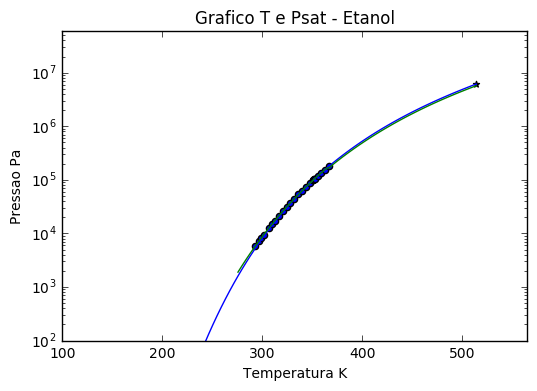

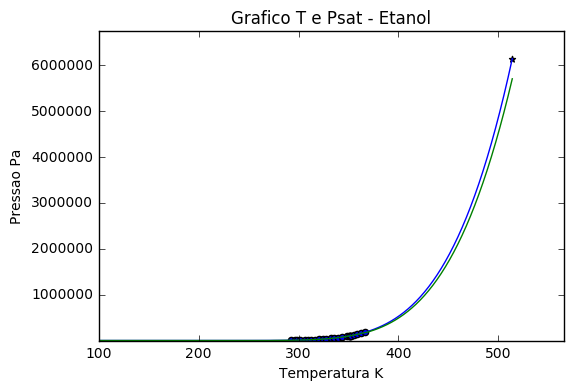

In [13]:
import matplotlib.pyplot as plt

# Gerando matriz de dados com Pressão calculada por Antoine

Pantoineaxis = np.zeros(100) 
Pantoineaxis = [ Pantoine(Taxis[i]) for i in range(100) ] 

plt.figure(1)                       # Figura 1 = Gráfico em escala semilog em y
plt.title('Grafico T e Psat - Etanol')
plt.xlim([100,1.1*Tc])              # Definindo limites de T e P para o grafico semilog
plt.ylim([100,10*Pc])
plt.xlabel('Temperatura K')
plt.ylabel('Pressao Pa')

plt.scatter(T_exp,P_exp)            # Pontos experimentais
plt.semilogy(Taxis,Paxis)           # Pontos calculados por SRK
plt.semilogy(Taxis,Pantoineaxis)    # Pontos calculados por Antoine

plt.scatter(Tc,Pc,marker="*")       # Ponto crítico marcado com asterisco para ver se o gráfico chegou até lá com sucesso


plt.figure(2)                       # Figura 2 = Gráfico em escala linear em y
plt.title('Grafico T e Psat - Etanol')
plt.xlim([100,1.1*Tc])              # Definindo limites de T e P para o grafico linear
plt.ylim([100,1.1*Pc])
plt.xlabel('Temperatura K')
plt.ylabel('Pressao Pa')


plt.scatter(T_exp,P_exp)            # Pontos experimentais
plt.plot(Taxis,Paxis)               # Pontos calculados por SRK
plt.plot(Taxis,Pantoineaxis)        # Pontos calculados por Antoine

plt.scatter(Tc,Pc,marker="*")       # Ponto crítico marcado com asterisco para ver se o gráfico chegou até lá com sucesso

plt.show()

## Cálculo de Entalpia e Entropia

Uma vez calculadas as condições de saturação (temperatura e pressão), o próximo objetivo do trabalho foi calcular a Entalpia e Entropia para o componente puro selecionado. Pode-se seguir o mesmo raciocínio utilizado para o cálculo de Gresidual. Calculando-se as propriedades residuais é possivel calcular as propriedades. 

Para a equação de SRK, as seguintes equações foram encontradas para o cálculo da entalpia residual e entropia residual:

$\frac{H^{res}}{RT}= {(Z-1)}+ [\frac{dlnalpha(Tr)}{dlnTr}-1]{q}{I}$

Onde:
 

$Z=\frac{PV}{RT}$  O cálculo de Z será realizado considerando os volumes do líquido ou de vapor, a depender da fase estudada

$q=\frac{alpha}{bRT}$          

$I={ln(\frac{Z+Beta}{Z})}$

> Smith, van Ness, Abbott, 2005, 7th-pt-BR, Capítulo 6

Para SRK:

$\frac{dlnalpha(Tr)}{dlnTr}=-{m}(\frac{Tr}{alpha})^{0.5}$

A partir do valor calculado para G residual das fases líquida e vapor e dos valores de entalpia, a entropia é calculada conforme a relação abaixo:

${S^{res}}= \frac{Hres-Gres}{T}$


Para calcular o valor de deltaH real, pode-se considerar que, na curva de equilíbrio L-V, a contribuição de Hresidual será a mesma para as duas fases. Então, deltaH residual será muito próximo do deltaH real, que é experimental (deltaH de vaporização). Então, os valores de deltaHresidual serão próximos aos valores de deltaHvaporização. 


O valor experimental de deltaH vaporizacao do etanol é:  (http://www.sciencedirect.com/science/article/pii/0021961489901018)
>* 38 kJ/mol a 352 K


In [14]:
# Cálculo da entalpia residual e entropia residual

def HSFUNCIONALIZADO(T,P):
    
    Tr=T/Tc
    m=(0.48+1.574*w-0.176*w**2)
    alpha=(1+(m*(1-Tr**0.5)))**2
    a=0.42748*(alpha*R**2*Tc**2)/Pc
    
    # Calculando os volumes
    # Declaração dos coeficientes da Raiz da EOS de SRK
    c3 = P                      #coeficiente de v^3  
    c2 = -(R*T)                 #coeficiente de v^2
    c1 = (a-P*b**2-R*T*b)       #coeficiente de v^1  
    c0 = -a*b                   #coeficiente de v^0
    v=np.roots([c3,c2,c1,c0])   #Para achar as raízes do polinômio, utiliza-se a biblioteca do numpy importada anteriormente
    [v_Liq, v_intermediate, v_Vap] = np.sort(v)
                                #print( "VL",v_Liq,"VV", v_Vap )

    Z_liq=P*v_Liq/(R*T)
    Z_vap=P*v_Vap/(R*T)
    
        
    ###ENTALPIA
    beta=b*P/(R*T)
    q=a/(b*R*T)
    I_liq=np.log((Z_liq+beta)/Z_liq)
    I_vap=np.log((Z_vap+beta)/Z_vap)
    der_Tr=-m*(Tr/alpha)**0.5
    
    
    Hres_liq=R*T*(Z_liq-1+(der_Tr-1)*q*I_liq)
    Hres_vap=R*T*((Z_vap-1)+(der_Tr-1)*q*I_vap)
    Res_H=abs(Hres_liq - Hres_vap)
    
    #print("Hres_liq",Hres_liq)
    #print("Hres_vap",Hres_vap)
    print("Res_H",Res_H, "J/mol",Res_H/18,"kJ/kg")
    
    
    
    ###ENTROPIA
    
    Gres_liq=R*T*(Z_liq-1-np.log(Z_liq-beta)-q*I_liq)
    Gres_vap=R*T*(Z_vap-1-np.log(Z_vap-beta)-q*I_vap)
    Res_G=abs(Gres_liq - Gres_vap)
    print("Res_G",Res_G)
    
    Sres_liq=(Hres_liq-Gres_liq)/T
    Sres_vap=(Hres_vap-Gres_vap)/T
    Res_S=abs(Sres_liq - Sres_vap)
    
    print("Sres_liq",Sres_liq)
    print("Sres_vap",Sres_vap)
    print("Res_S",Res_S, "J/mol",Res_S/18,"kJ/kg")
    
    
    return Hres_liq, Hres_vap, Sres_liq, Sres_vap

# Teste na temperatura de 352 K, para comparar com o dado experimental de deltaH de vaporização do etanol

teste = HSFUNCIONALIZADO(352,P_sat(352,1e5))        # Temperatura de ebulição atmosferica aproximado
print teste

# O calculo de Res_H (Hliq - Hvap) nesta T é igual a 40000 J/mol, da mesma ordem de grandeza do valor experimental de 38000 J/mol


('Res_H', 40029.607458010716, 'J/mol', 2223.8670810005951, 'kJ/kg')
('Res_G', 1.3777423646388343e-11)
('Sres_liq', -114.11455759590181)
('Sres_vap', -0.3940818629167962)
('Res_S', 113.72047573298502, 'J/mol', 6.3178042073880567, 'kJ/kg')
(-40232.216536201602, -202.60907819088604, -114.11455759590181, -0.3940818629167962)


('Res_H', 63207.917094367884, 'J/mol', 3511.5509496871045, 'kJ/kg')
('Res_G', 1.181555802531875e-11)
('Sres_liq', -632.07917094367895)
('Sres_vap', 0.0)
('Res_S', 632.07917094367895, 'J/mol', 35.115509496871056, 'kJ/kg')
('Res_H', 62725.526297162833, 'J/mol', 3484.7514609534906, 'kJ/kg')
('Res_G', 6.1547719150169223e-12)
('Sres_liq', -602.08331508150354)
('Sres_vap', 0.0)
('Res_S', 602.08331508150354, 'J/mol', 33.449073060083528, 'kJ/kg')
('Res_H', 62251.454509021823, 'J/mol', 3458.4141393901014, 'kJ/kg')
('Res_G', 2.2210583432763736e-29)
('Sres_liq', -574.47883036532755)
('Sres_vap', 1.8461809414560544e-15)
('Res_S', 574.47883036532755, 'J/mol', 31.915490575851532, 'kJ/kg')
('Res_H', 61785.170358434807, 'J/mol', 3432.5094643574894, 'kJ/kg')
('Res_G', 6.6487577197320166e-12)
('Sres_liq', -548.9944860734937)
('Sres_vap', 0.0)
('Res_S', 548.9944860734937, 'J/mol', 30.49969367074965, 'kJ/kg')
('Res_H', 61326.190045059033, 'J/mol', 3407.0105580588352, 'kJ/kg')
('Res_G', 6.8957506220895637e

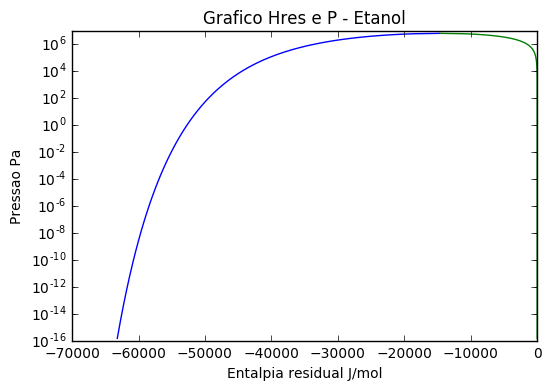

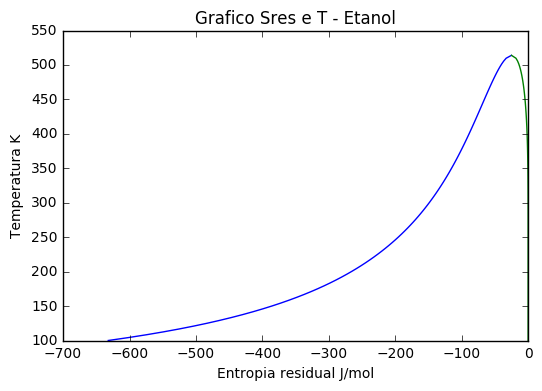

In [15]:
# Agrupando os resultados de entalpia e entropia

H_axis_l = np.zeros(100)
H_axis_v = np.zeros(100)
S_axis_l = np.zeros(100)
S_axis_v = np.zeros(100)

for i in range (0,100):
    H_axis_l[i], H_axis_v[i],S_axis_l[i], S_axis_v[i]=(HSFUNCIONALIZADO(Taxis[i],Paxis[i]))
    
#print(H_axis_l, H_axis_v,S_axis_l, S_axis_v)

plt.figure(1)
plt.title('Grafico Hres e P - Etanol')
plt.semilogy(H_axis_l,Paxis)
plt.semilogy(H_axis_v,Paxis)
plt.xlabel('Entalpia residual J/mol')
plt.ylabel('Pressao Pa')


plt.figure(2)
plt.title('Grafico Sres e T - Etanol')
plt.plot(S_axis_l,Taxis)
plt.plot(S_axis_v,Taxis)
plt.xlabel('Entropia residual J/mol')
plt.ylabel('Temperatura K')


plt.show()